# NABS Density plot

## System
Density relaxation for a time peroid of 1ns.

System: Al0, Al1, Al2.5, Al5, Al7.5, Al10, Al12.5, Al15, Al17.5, Al20.


In [1]:
!echo "hello python"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
font = {'family' : 'CMU Serif',
        'weight' : 'bold',
        'size'   : 20}

matplotlib.rc('font', **font)

plt.rc('text', usetex=True)
plt.rc('font', family='CMU Serif',)

matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

hello python


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


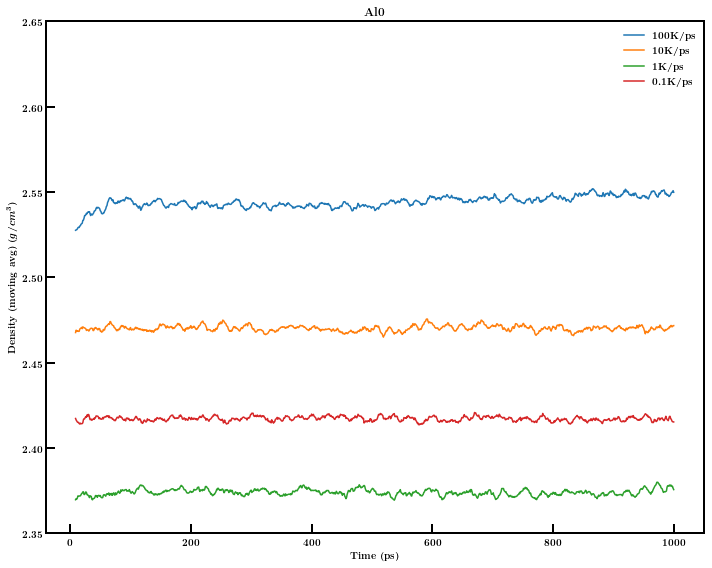

In [5]:
cooling_rate = [10,1,0.1,100]
a=['al0','al1','al2.5','al5','al7.5','al10','al12.5','al15','al17.5','al20']
seq = [4,1,2,3]

for j in range(1):
    fig,(ax) = plt.subplots(1, 1, figsize=(10, 8), tight_layout=True)
    ax.clear()
    
    data = []
    names = []
    df = []
    for i in range(4):
        
        foldername = './cool'+str(j+1)+'_'+str(seq[i])+'/'
        filename = foldername + 'log.lammps'
        data.append(np.genfromtxt(filename, skip_header=120,max_rows=1001))
        names.append(np.genfromtxt(filename, skip_header=119,max_rows=1,dtype=str))
        df.append(pd.DataFrame(data[i],columns=names[i]))
        df[i]['Density_moving_avg'] = df[i]['Density'].rolling(window=10).mean()
        df[i].to_csv(foldername+'data.csv')
        
    for i in range(4):
        ax.plot(df[i]['Step']/1000, df[i]['Density_moving_avg'], label=r'\textbf{{{}}}'.format(str(cooling_rate[seq[i]-1])+'K/ps'))
    
    ax.set_title(r'\textbf{{{}}}'.format(a[j].title()))
    ax.set_xlabel(r'\textbf{Time (ps)}')
    ax.set_ylabel(r'\textbf{Density (moving avg)} $(g/cm^3)$')
    ax.set_ylim([2.35,2.65])
    ax.legend(loc='upper right')  #,bbox_to_anchor=(1,1),)
    
    plt.legend(frameon=False)
    ax.tick_params(direction='in', length=9, width=2, colors='k',
               grid_color='k', grid_alpha=0.5, )
    
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    
    fig.savefig(a[j]+'.png',format=None,dpi=300,bbox_inches="tight")
    fig.show() 

In [3]:
#import the pandas library and aliasing as pd
import pandas as pd
import numpy as np


In [5]:
data = np.array(['a','b','c','d'])
s = pd.Series(data)
print(s)

0    a
1    b
2    c
3    d
dtype: object


In [9]:
s = pd.Series(data,index=[100,101,102,103])
print (s)

100    a
101    b
102    c
103    d
dtype: object


In [11]:
#import the pandas library and aliasing as pd
import pandas as pd
import numpy as np
data = {'a' : 0., 'b' : 1., 'c' : 2.}
s = pd.Series(data)
print (s)


a    0.0
b    1.0
c    2.0
dtype: float64


In [14]:
#import the pandas library and aliasing as pd
import pandas as pd
import numpy as np
data = {'a' : 0., 'b' : 1., 'c' : 2.}
s = pd.Series(data,index=['b','c','d','a','e','f'])
print (s)

b    1.0
c    2.0
d    NaN
a    0.0
e    NaN
f    NaN
dtype: float64


In [15]:
#import the pandas library and aliasing as pd
import pandas as pd
import numpy as np
s = pd.Series(5, index=[0, 1, 2, 3])
print (s)

0    5
1    5
2    5
3    5
dtype: int64
